# K-means 聚类

## K-means 聚类分析原理与算法描述

1. 随机选择 K 个聚类中心
2. 分配每个点到其最近的聚类中心，重新计算聚类中心
3. 重复 2 步骤，直到聚类中心不发生变化。

主要思想是把 N 个样本$\{x_1,x_2,...,x_N\}$划分为 K 个聚类(cluster)$\{c_1,c_2,...,c_K\}$，每个类之间的相似度高，
而类与类之间的相似度低，样本之间的相似度通过样本之间的欧式距离来衡量。K-means 的代价函数可以表示为：
$$
    J = \sum_{j=1}^{K}\sum_{i=1}^{N}{\lVert x_{i}^j - c_{j}\rVert}^2
$$

最基本的 K-means 算法包括以下几个步骤：
(1) 从所有的 N 个训练数据中选取 K 个数据作为初始的聚类中心。
(2) 计算所有样本与每个中心的距离，并按照距离最小的原则进行类别分配。
(3) 用每类中新的数据重新计算聚类中心。
(4) 不断重复步骤(2)-(3)进行迭代，直到满足终止条件条件为止。


data shape:  (2, 100)


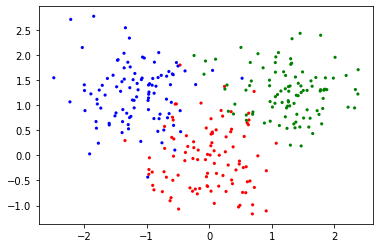

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# 第一组数据
mean_1 = (0, 0)
cov_1 = [[0.3, 0], [0, 0.35]]
X_1 = np.random.multivariate_normal(mean_1, cov_1, 100).T
# 第二组数据
mean_2 = (1.25, 1.25)
cov_2 = [[0.3, 0], [0, 0.35]]
X_2 = np.random.multivariate_normal(mean_2, cov_2, 100).T
# 第三组数据
mean_3 = (-1.25, 1.25)
cov_3 = [[0.3, 0], [0, 0.35]]
X_3 = np.random.multivariate_normal(mean_3, cov_3, 100).T

print("data shape: ", X_3.shape)

# 显示数据
plt.scatter(X_1[0,:], X_1[1,:], c='r', s=10, edgecolor='none')
plt.scatter(X_2[0,:], X_2[1,:], c='g', s=10, edgecolor='none')
plt.scatter(X_3[0,:], X_3[1,:], c='b', s=10, edgecolor='none')
plt.show()

In [62]:
X = np.concatenate((X_1, X_2, X_3), axis=1)
C = 3  # 簇
N, M = X.shape  # 样本维数和样本数
pattern = np.zeros((N+1, M))  # 添加一行存储距离
center = np.zeros((N, C))  # 初始化聚类中心
pattern[0:N, :] = X

# 初始化聚类中心
for c in range(C):
    center[:, c] = X[:, np.random.randint(0, M)]
   
# 聚类
while True:
    distance = np.zeros((1, C))  # 样本到每个聚类中心的距离
    num = np.zeros((1, C))  # 存储每个簇的样本数
    new_center = np.zeros((N, C))
    for m in range(M):
        for c in range(C):
            distance[0][c] = np.sqrt(np.sum((X[:, m] - center[:, c]) ** 2))
        temp = np.argmin(distance)  # 最小距离的簇label
        pattern[N][m] = temp
    
    k = 0
    for c in range(C):
        for m in range(M):
            if pattern[N][m] == c:
                new_center[:, c] += pattern[0:N, m]
                num[0][c] += 1
        new_center[:, c] = new_center[:, c]/num[0][c]
        if np.sqrt(np.sum((new_center[:, c] - center[:, c]) ** 2)) < 0.1:
            k = k+1
    if k == C:
        break
    else:
        center = new_center.copy()

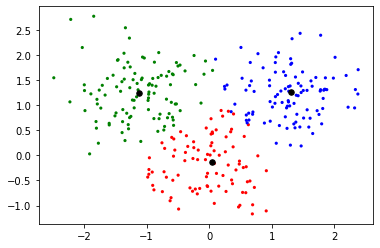

In [63]:
# 显示聚类后数据
color = ['r', 'g', 'b']
for m in range(M):
    for c in range(C):
        if pattern[2][m] == c:
            plt.scatter(pattern[0][m], pattern[1][m], c=color[c],
                        s=10, edgecolor='none')
plt.scatter(center[0, :], center[1, :], c='black', s=30)
plt.show()